In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:


file_path = "/content/Dummy Data HSS.csv"

df = pd.read_csv(file_path)

In [15]:
print(df.head())


     TV      Radio  Social Media Influencer       Sales
0  16.0   6.566231      2.907983       Mega   54.732757
1  13.0   9.237765      2.409567       Mega   46.677897
2  41.0  15.886446      2.913410       Mega  150.177829
3  83.0  30.020028      6.922304       Mega  298.246340
4  15.0   8.437408      1.405998      Micro   56.594181


In [16]:
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


,TV,Radio,Social Media,Influencer,Sales
count,4562.000000,4568.000000,4566.000000,4572,4566.000000
unique,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,Mega,NaN
freq,NaN,NaN,NaN,1158,NaN
mean,54.066857,18.160356,3.323956,NaN,192.466602
std,26.125054,9.676958,2.212670,NaN,93.133092
min,10.000000,0.000684,0.000031,NaN,31.199409
25%,32.000000,10.525957,1.527849,NaN,112.322882
50%,53.000000,17.859513,3.055565,NaN,189.231172
75%,77.000000,25.649730,4.807558,NaN,272.507922


In [18]:
# Check for duplicates
df.duplicated().sum()

# Exploring the missing values
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [19]:
df1 = df.dropna()

print('Number of missing values:', df1.isna().sum())

Number of missing values: TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64


# Exploratory Data Analysis

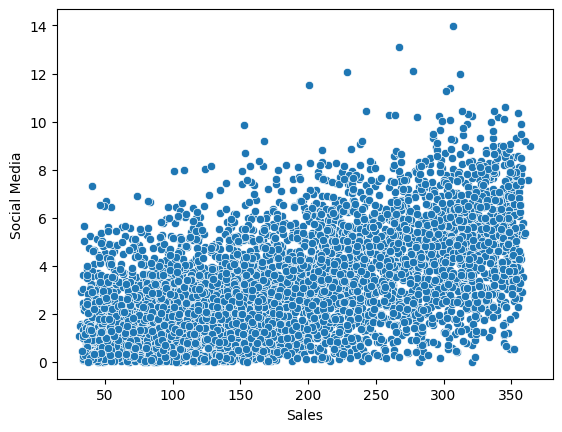

In [21]:
# Relationship between Sales and Social Media

sns.scatterplot(data = df1, x = 'Sales', y='Social Media')
plt.show()

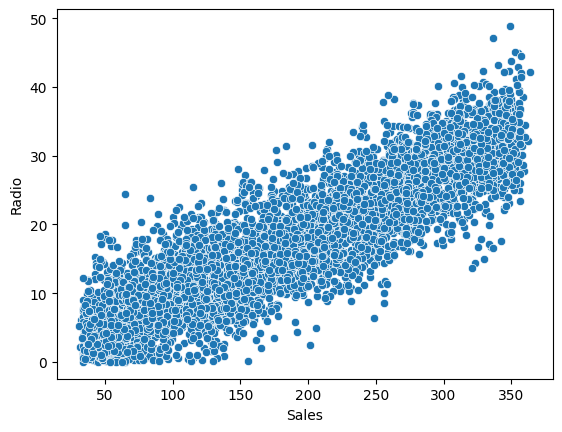

In [22]:
#Relationship between Sales and Radio

sns.scatterplot(data = df1, x = 'Sales', y = 'Radio')
plt.show()

<ipython-input-23-2a68984a6be5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='Influencer', y='Sales', palette = 'Set3')


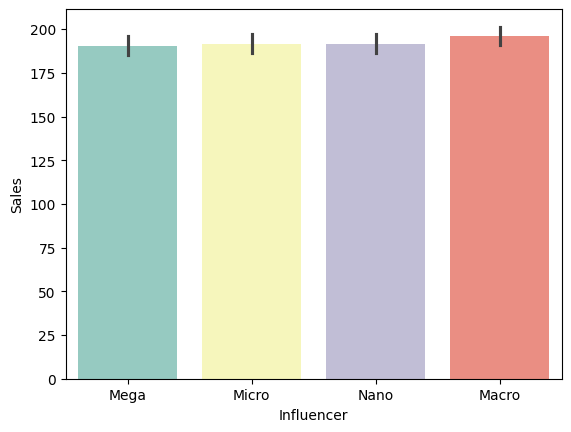

In [23]:
# Relationship between Sales and Influencer
sns.barplot(data=df1, x='Influencer', y='Sales', palette = 'Set3')
plt.show()

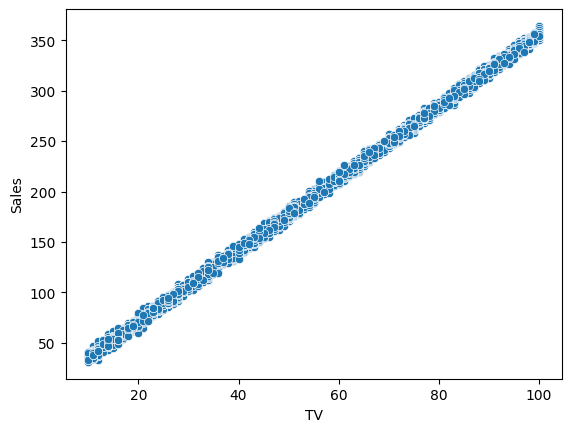

In [24]:
# Relationship between sales and TV
sns.scatterplot(x='TV', y='Sales', data=df1)
plt.show()

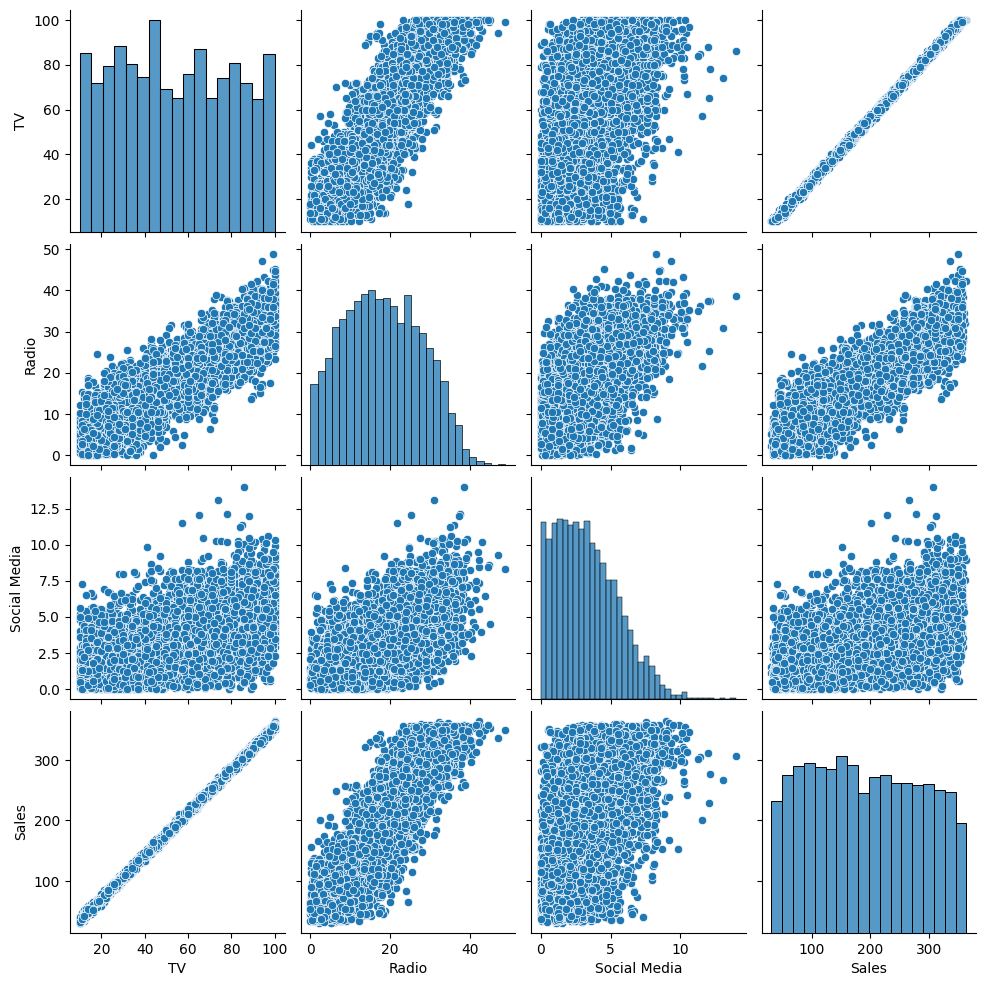

In [25]:
# Chart to check the relationship between the variables
fig = sns.pairplot(data = df1)
plt.show()

In [26]:
print(df1.groupby('Influencer')['Sales'].mean())

Influencer
Macro    196.066150
Mega     190.412908
Micro    191.578370
Nano     191.708827
Name: Sales, dtype: float64


The categories for Influencer have different average Sales, but the variation is not substantial. Influencer may be a weak predictor of Sales.

### **Model Development**

In [29]:
#Model Features

X = df1['TV']

y = df1['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [30]:
X_train_reshaped = np.array(X_train).reshape(-1, 1)

# Create and fit the model
model = LinearRegression()
model.fit(X_train_reshaped, y_train)

LinearRegression()

In [31]:
# Evaluate the model performance on the training data
r_sq = model.score(X_train_reshaped, y_train)
print('Coefficient of determination:', r_sq)

Coefficient of determination: 0.9989854249505741


An R-squared value close to 1 indicates that the model explains a high percentage of the variability in Sales. In this case, approximately 99.90% of the variance in Sales can be explained by the TV advertising budget.